C:\Users\18228\AppData\Local\Temp\ipykernel_18908\265388050.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)  # Ensure the input is a Tensor type


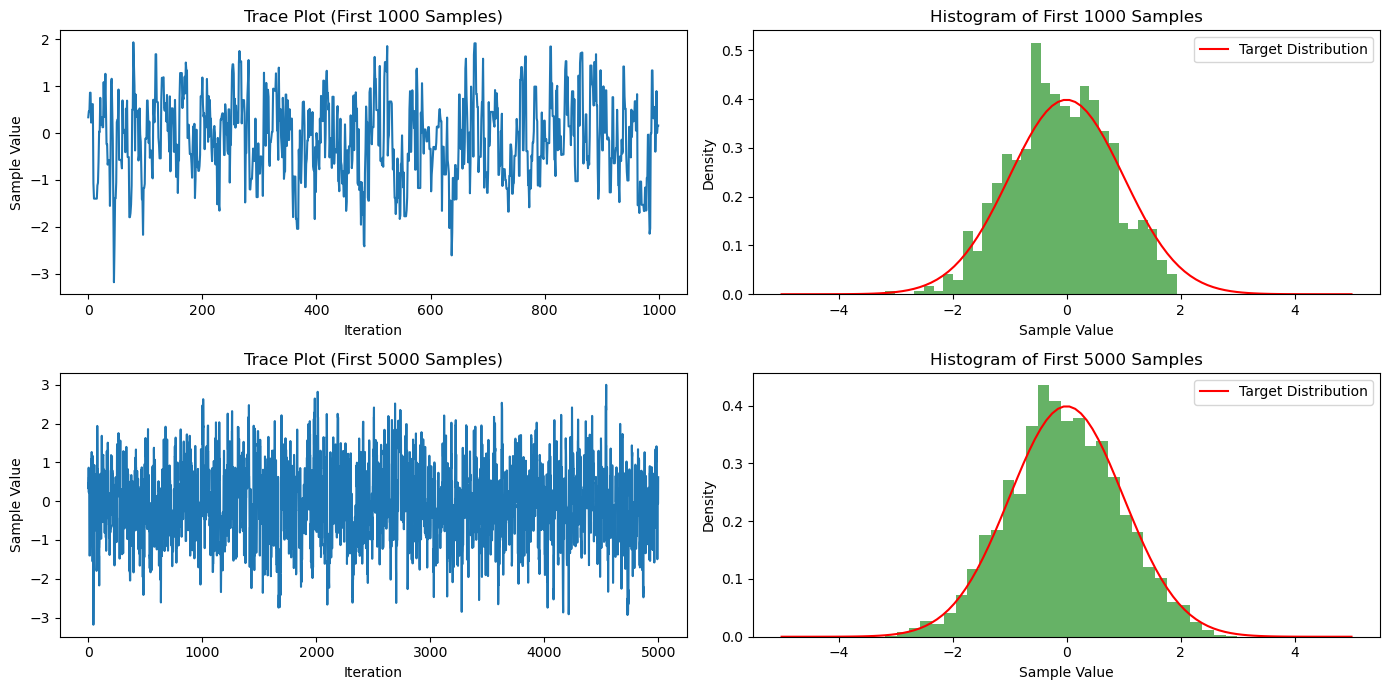

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Set the random seed for reproducibility
torch.manual_seed(42)

# Target distribution: Standard normal distribution p(x) = exp(-x^2 / 2)
def target_distribution(x):
    x = torch.tensor(x)  # Ensure the input is a Tensor type
    return torch.exp(-x ** 2 / 2)

# Proposal distribution: Normal distribution q(x' | x_t) = N(x_t, sigma^2)
def proposal_distribution(x_t, sigma=1.0):
    return torch.normal(mean=x_t, std=torch.tensor(sigma))

# Metropolis-Hastings algorithm
def metropolis_hastings(num_samples, initial_state=0.0, sigma=1.0):
    samples = torch.zeros(num_samples)  # To store the samples
    current_state = torch.tensor(initial_state)  # Ensure the initial state is a Tensor
    
    for t in range(num_samples):
        # Generate a proposed state from the proposal distribution
        proposed_state = proposal_distribution(current_state, sigma)
        
        # Compute the acceptance probability alpha
        acceptance_prob = torch.min(torch.tensor(1.0), target_distribution(proposed_state) / target_distribution(current_state))
        
        # Accept or reject the proposed state based on the acceptance probability
        if torch.rand(1) < acceptance_prob:
            current_state = proposed_state
        
        # Store the current state as a sample
        samples[t] = current_state
    
    return samples

# Set sampling parameters
num_samples = 10000  # Total number of samples
initial_state = 0.0  # Initial state
sigma = 1.0  # Standard deviation of the proposal distribution

# Perform MCMC sampling
samples = metropolis_hastings(num_samples, initial_state, sigma)

# Plot the convergence process (trace and histogram)
plt.figure(figsize=(14, 7))

# Plot the trace of the first 1000 samples
plt.subplot(2, 2, 1)
plt.plot(samples[:1000].numpy())
plt.title('Trace Plot (First 1000 Samples)')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')

# Plot the histogram of the first 1000 samples
plt.subplot(2, 2, 2)
plt.hist(samples[:1000].numpy(), bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(-5, 5, 100)
plt.plot(x, (1/np.sqrt(2*np.pi)) * np.exp(-x**2 / 2), 'r', label='Target Distribution')
plt.title('Histogram of First 1000 Samples')
plt.xlabel('Sample Value')
plt.ylabel('Density')
plt.legend()

# Plot the trace of the first 5000 samples
plt.subplot(2, 2, 3)
plt.plot(samples[:5000].numpy())
plt.title('Trace Plot (First 5000 Samples)')
plt.xlabel('Iteration')
plt.ylabel('Sample Value')

# Plot the histogram of the first 5000 samples
plt.subplot(2, 2, 4)
plt.hist(samples[:5000].numpy(), bins=30, density=True, alpha=0.6, color='g')
plt.plot(x, (1/np.sqrt(2*np.pi)) * np.exp(-x**2 / 2), 'r', label='Target Distribution')
plt.title('Histogram of First 5000 Samples')
plt.xlabel('Sample Value')
plt.ylabel('Density')
plt.legend()

# Adjust the layout of the plots
plt.tight_layout()
plt.show()